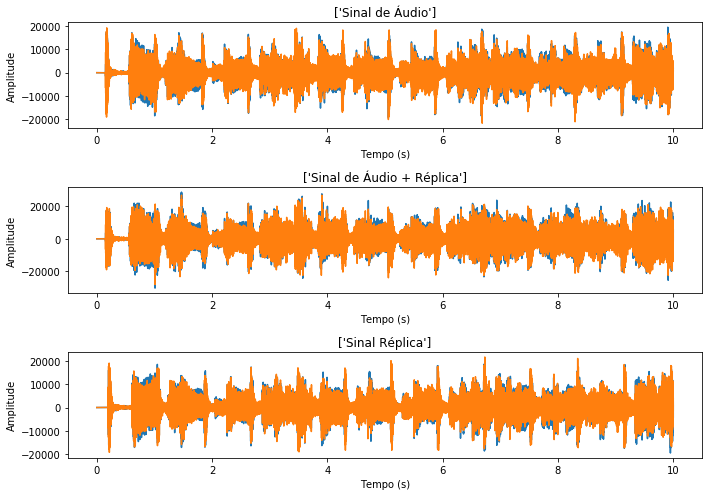

In [4]:
import numpy as np
import scipy.io.wavfile as wv 
import os
import matplotlib.pyplot as plt

soundFile = '/home/victor/DCO2004_LabPSC/MATERIAL/HD_02_MATLAB/sound_02.wav' # Especifica do local e nome do arquivo de áudio
dFa,vtSom = wv.read(soundFile)                     # Abre arquivo
tf = 10                                            # Tempo que deseja tocar o arquivo
amostrasTf = int(np.ceil(tf*dFa))                  # Número de amostras para o tempo especificado
vtSom = vtSom[0:amostrasTf,:]                      # Considera somente as amostras para o tempo especificado
dta = 1/dFa                                        # Tempo entre amostras
dTFinal = (len(vtSom)-1)*dta                       # Tempo da última amostra do sinal de áudio
vtTSom = np.arange(0,dTFinal+dta,dta)              # Eixo temporal do arquivo de áudio
plt.figure(1,[10,7])
plt.subplot(311)
plt.plot(vtTSom,vtSom)                             # Plota gráfico do áudio
plt.title(['Sinal de Áudio'])                      # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')                            # Configura eixo Y do gráfico

wv.write('/home/victor/DCO2004_LabPSC/MATERIAL/HD_02_PYTHON/sem_eco.wav',dFa,vtSom)
os.system('vlc --play-and-exit /home/victor/DCO2004_LabPSC/MATERIAL/HD_02_PYTHON/sem_eco.wav') 

## Modifica o arquivo incluindo eco (uma réplica atrasada do sinal oirginal)
n = 2000                                           # Atraso da réplica do sinal                                                          
eco = np.zeros([len(vtSom),2])
end=len(vtSom)
eco[n:,:] = vtSom[0:end-n,:] 
vtSomEco = np.zeros([len(eco),2])
vtSomEco += eco
vtSomEco += vtSom

wv.write('/home/victor/DCO2004_LabPSC/MATERIAL/HD_02_PYTHON/com_eco.wav',dFa,vtSomEco.astype('int16'))
os.system('vlc --play-and-exit /home/victor/DCO2004_LabPSC/MATERIAL/HD_02_PYTHON/com_eco.wav') 

plt.subplot(312)                                   # Segundo gráfico do subplot


plt.plot(vtTSom,vtSomEco)                          # Plota gráfico do áudio
plt.title(['Sinal de Áudio + Réplica'])            # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')    


plt.subplot(3,1,3)                                 # Terceiro gráfico do subplot
plt.plot(vtTSom,vtSom-vtSomEco)                    # Plota gráfico do áudio
plt.title(['Sinal Réplica'])                       # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')                            # Configura eixo Y do gráfico

plt.tight_layout()
plt.show()